In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np

from phidl import Device, Layer, LayerSet, make_device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.routing as pr
import phidl.utilities as pu

# import customed geolib
import mine as mn

In [5]:
# waveguide: 1st para is length, second is width
def waveguide(width = 10, height = 1):
    WG = Device('waveguide')
    WG.add_polygon( [(0, 0), (width, 0), (width, height), (0, height)] )
    WG.add_port(name = 'wgport1', midpoint = [0,height/2], width = height, orientation = 180)
    WG.add_port(name = 'wgport2', midpoint = [width,height/2], width = height, orientation = 0)
    return WG

In [9]:
def asym(width = 10, height1 = 1, height2 = 0.8):
    WG = Device('asym')
    gap=(height1-height2)*0.5
    WG.add_polygon( [(0, -height1*0.5), (width, -height2*0.5), (width, height2*0.5), (0, height1*0.5)] )
#     WG.add_port(name = 'wgport1', midpoint = [0,height/2], width = height, orientation = 180)
#     WG.add_port(name = 'wgport2', midpoint = [width,height/2], width = height, orientation = 0)
    return WG

def taper_guide():
    D = Device('taper_guide')
    left= D << waveguide(3e3,0.7)
    right  =D << waveguide(3e3,0.7).movex(7e3)
    center= D << waveguide(3e3,0.4).movex(3.5e3).movey(0.15)
    D << asym(width=0.5e3,height1=0.7,height2=0.4).movex(3e3).movey(0.35)
    D << asym(width=0.5e3,height1=0.4,height2=0.7).movex(6.5e3).movey(0.35)
    return D

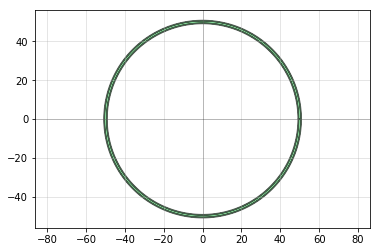

In [3]:
D = Device()
D << mn.slot_ring()

qp(D)
# D.write_gds('slot_ring.gds')